In [2]:
from matplotlib import style
from nm_lib import nm_lib as nm
style.use('dark_background')
#import importlib
#importlib.reload(nm)

# Discretization of a function of a single variable. Differentiation through finite differences.

## 1 – Code to represent the function and the analytical and numerical derivative.

Consider the function

$$h(x) = \cos\left[\frac{\pi (x-1)}{2}\right] \exp\left[-\left(\frac{x-3}{2.5}\right)^2\right],\tag{1}$$

with $x \in (-4,10) $.

Let us define a sampling of $h$ with 64 intervals, that is, 65 points, and store the
values into double precision arrays called $xx$ and $hh$. Numpy arrays are double precision as 
default. To define $xx$ in Python you can use the commands:

`import numpy as np
nump=65
x0=-4.0 
xf=10.0
xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0`

Use `matplotlib.pyplot` to visualize hh vs xx. 

stepsize:  0.4375  error:  0.039298785425684324


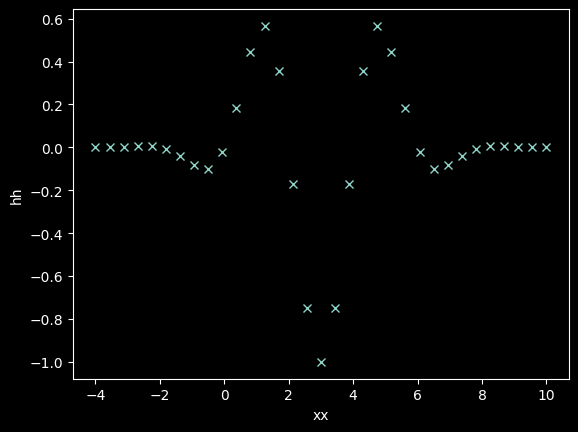

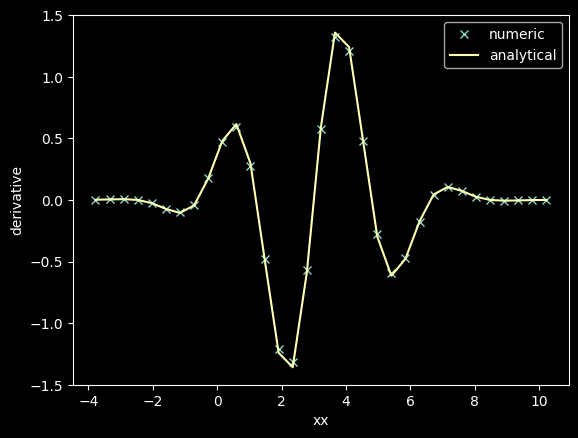

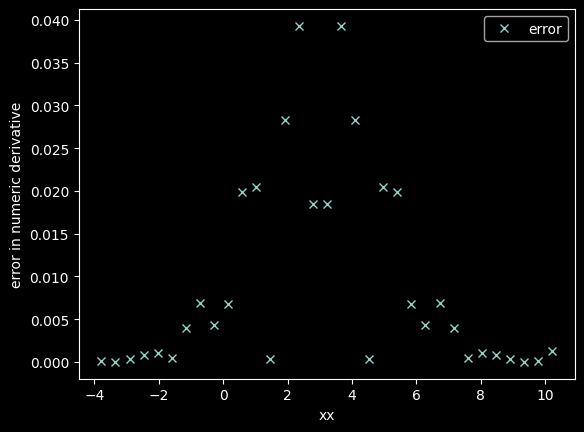

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#import nm_lib as nm

nump = 33
x0 = -4
xf = 10.0

xx = np.linspace(x0,xf,nump)
dx = xx[1]-xx[0]
#xx = np.arange(nump)/(nump-1) * (xf-x0) + x0

def h(x):
    return np.cos(np.pi*(x-1)*0.5)*np.exp(-((x-3)/2.5)**2)

def deriv(xx,hh):
    dh = hh[1:-1]-hh[0:-2]
    dx = xx[1:-1]-xx[0:-2]
    dhdx = dh/dx
    return dhdx

def ana(x):
    return np.exp(-0.16*(x-3)**2)*((0.96-0.32*x)*np.sin(np.pi*0.5*x)+1.5708*np.cos(np.pi*x*0.5))



hh = h(xx)
plt.plot(xx,hh, 'x')
xx_half = xx[:]+dx*0.5
anader = ana(xx_half)
plt.xlabel("xx")
plt.ylabel("hh")
dhdx = nm.deriv_dnw(xx,hh)


plt.figure()
plt.plot(xx_half,dhdx,"x", label="numeric")
plt.plot(xx_half,anader, label="analytical")
plt.ylim(-1.5,1.5)
plt.legend()
plt.xlabel("xx")
plt.ylabel("derivative")

plt.figure()
err = [abs(x-an) for x,an in zip(dhdx,anader)]
plt.plot(xx_half,err,"x", label="error")
plt.legend()
plt.xlabel("xx")
plt.ylabel("error in numeric derivative")

print("stepsize: ",dx," error: ",np.max(err))



Define the variable $nint$ as the number of intervals ($nint= 64$ in the present case)
and $nump$ as the number of points. In IDL, Python and C, those components go
from the $0-$component through the component $nump−1$. Compute the ratio (1) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization) using and filling the function `deriv_dnw` in `nm_lib`. Feel free to use any known library or create your own functions from scratch. 

It will depend on how you created the function that you have $nump$ or $nump−1$ elements. If the former, the last component ($nump-1$) is ill calculated. $hp$ contains a second-order approximation to the derivative of the $hh$ function at the intermediate points $x_{i+1/2}$.

## Tasks:

1. Plot $hh$ versus $xx$ as a solid line with crosses added at each grid point (to visualize the goodness of the discretization) or with `plt.hist` function combined with `plt.plot`. _Make sure the axis pixels are properly located either to the center or half grid shifted_

2. Plot the array containing the numerical derivative, $hp$. Calculate analytically the derivative of the function (1) and represent it in the same figure to ascertain the goodness of the approximation for that number of points. __hint__ _make sure the axis pixels are properly located either to the center or half grid shifted_. 

3. Repeat the foregoing, but now using $nint= 32$ and $nint= 16$ intervals to see how the approximation deteriorates. Thereafter, repeat the same process for 128 and 256 intervals, to see how it improves. Consider to use `plt.semilogy` for the error. 

## 2- Test of the quadratic order of the approximation.

We are going to test if the ratio $(h_{i+1}-h_i)/(x_{i+1}-x_i)$ approaches the analytical value of the derivative. To that end, we will use samplings with, successively, 16, 32, 64, 128, 256, 512 and 1024 intervals (which are successive powers of 2). Calculate the maximum of the absolute value of the error, meaning: the difference between the analytical and the numerical derivatives at the _same points_. Plot a graph of that value versus the size of the interval in each case using a diagram with logarithmic axes. Check if the curve you get corresponds to a quadratic dependence.

Text(0, 0.5, 'max error')

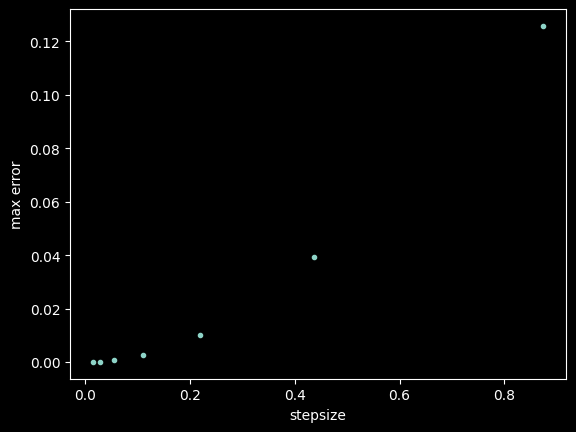

In [4]:
numps = [x+1 for x in [16,32,64,128,256,512,1024]]
x0 = -4
xf = 10.0

max_err = []
stepsizes = []
for nump in numps:
    xx = np.linspace(x0,xf,nump)
    dx = xx[1]-xx[0]
    stepsizes.append(dx)
    hh = h(xx)
    xx_half = xx[0:-1]+dx*0.5   #Halfstep and leaves out the last few values
    anader = ana(xx_half)
    dhdx = nm.deriv_dnw(xx,hh)
    #print(dhdx)
    err = [abs(x-an) for x,an in zip(dhdx,anader)]
    max_err.append(max(err))

plt.plot(stepsizes,max_err,".")
plt.xlabel("stepsize")
plt.ylabel("max error")
#plt.semilogy()


## 3- Improving the accuracy of the test of the quadratic order of the approximation.

To test the accuracy of the result of the previous paragraph:

1. extend the test to a larger range of number of intervals (including 2048, 4096, 8192, 16384). Make sure to use double precision variables throughout the program (meaning: all variables except the array indices).

2. then try to fit a straight to the logarithm of the error curves using Python program `numpy.polyfit` and `numpy.poly1d`. From the value of the slope you get from that program, check the accuracy with which you obtain the quadratic dependence.

Fitted line is proporitonal to: x^1.946 
0.0


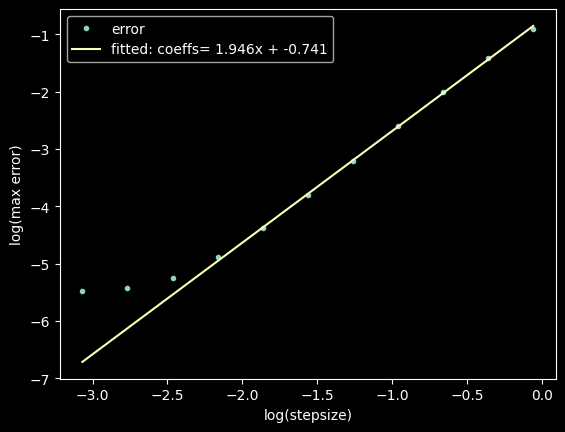

In [5]:
numps = [x+1 for x in [16,32,64,128,256,512,1024,2048,4096,8192,16384]]
x0 = -4
xf = 10.0
precision = np.float64


def get_error(precision):
    max_err = np.zeros(len(numps),dtype=precision)
    stepsizes = np.zeros(len(numps),dtype=precision)
    for i,nump in enumerate(numps):
        xx = np.linspace(x0,xf,nump, dtype=precision)
        dx = xx[1]-xx[0]
        stepsizes[i]=dx
        hh = h(xx)
        xx_half = xx[0:-1]+dx*0.5   #Halfstep and leaves out the last value
        anader = ana(xx_half)
        dhdx = nm.deriv_dnw(xx,hh, dtype=precision)

        #Make sure inferred dtype and precision is correct

        err = [np.abs(x-an) for x,an in zip(dhdx,anader)]
        max_err[i] = np.amax(err)

        #for i,val in enumerate([dhdx[0],anader[0], xx_half[0], dx, xx[0], max_err[0], hh[0], stepsizes[0], err[0]]):
        #    if type(val) != precision:
        #            raise TypeError(f"Wrong precision! {i}, {val} has {type(val)} not {precision}")

    return stepsizes, max_err


stepsizes, max_err =get_error(precision)

log_step = np.log10(stepsizes)
log_err = np.log10(max_err)


plt.plot(log_step,log_err,".", label="error")


coeff = np.polyfit(log_step[:-4].astype(np.float32),log_err[:-4].astype(np.float32),deg=1)
f = np.poly1d(coeff)
plt.plot(log_step,f(log_step), label = f"fitted: coeffs= {coeff[0]:.3f}x + {coeff[1]:.3f}")
plt.xlabel("log(stepsize)")
plt.ylabel("log(max error)")
plt.legend()

print(f"Fitted line is proporitonal to: x^{coeff[0]:.3f} ")

#Test the float128 ??? It's not doing anything...
print(np.float128(1) + np.float128(2**-64) - np.float128(1))
#plt.semilogx()
#plt.semilogy()

As seen in the figure above the error is proportional to the stepsize squared. By fitting a line to the logarithmiuc plot we can see the proportionality:

$$
y = \Delta x^b + c \rightarrow \log(y) = \log(b \Delta x + c)
$$

Here, the value $b$ represents the first coefficient, and when $b\approx 2$ we have a quadratic proportionality.  

/Users/juanms/Numerical_sim_course/students_2023/phd/Gaute_Amesson_Holen/nm_lib/nm_lib/src.py:226: RuntimeWarning: invalid value encountered in divide
  return dh/dx
/var/folders/yk/k4ljx2fs4tn8qnc71vzvnpbc000ml0/T/ipykernel_29298/1237660267.py:12: RuntimeWarning: divide by zero encountered in log10
  log_step = np.log10(stepsizes, dtype = pre)


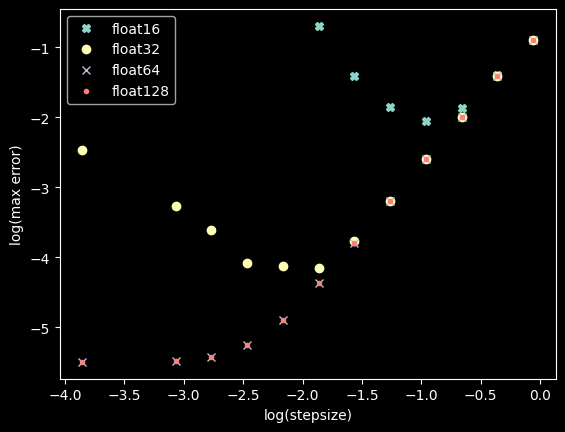

In [6]:
#numps = [x+1 for x in [16,32,64,128,256,512,1024,2048,4096,8192,16384,int(1e5),int(1e6)]]
numps = [x+1 for x in [16,32,64,128,256,512,1024,2048,4096,8192,16384,int(1e5)]]
x0 = -4
xf = 10.0
precision = [np.float16,np.float32, np.float64,np.float128]
labels = [16,32,64,128]
markers = ["X","o","x","."]

for pre,marker,label in zip(precision,markers,labels):
    stepsizes, max_err =get_error(pre)
    
    log_step = np.log10(stepsizes, dtype = pre)
    log_err = np.log10(max_err, dtype=pre)
    plt.plot(log_step,log_err,marker, label=f"float{label}")

    #coeff = np.polyfit(log_step[:-6].astype(np.float32),log_err[:-6].astype(np.float32),deg=1)
    #f = np.poly1d(coeff)
    #plt.plot(log_step,f(log_step), label = f"fitted: coeffs= {coeff[0]:.3f}x + {coeff[1]:.3f}")
    #print(f"float{label} Fitted line is proporitonal to: x^{coeff[0]:.3f} ")


plt.xlabel("log(stepsize)")
plt.ylabel("log(max error)")
legend = plt.legend()

In the figure above the error of different precision is plotted. After float64 it seems like the numerical error is the same, which seems wrong? this is because numpy is lying to you and there is actually no float128

<span style="color:green">JMS</span>.

<span style="color:blue">Good job </span>.

## 4- Analytical proof of the order of convergence of the approximation for the derivative (optional)

Consider the sampling used in exercise this, assuming that the spacing between grid points is uniform, i.e., $(\Delta x)_i = \Delta x$. Write a formal Taylor expansion as follows:


$$f(x_{i+1}) = f(x_{i+1/2}) + f'(x_{i+1/2})\frac{\Delta x}{2} + ...  \tag{2}$$

$$f(x_{i}) = f(x_{i+1/2}) - f'(x_{i+1/2})\frac{\Delta x}{2} + ...  \tag{3}$$

including terms up to order $(\Delta x)^3$. Eliminating terms combining those two expressions, conclude that, as said in the previous exercise sheet, the finite-difference approximation to the derivative at the midpoints $x_{i+1/2}$ carried out there is of 2nd order.

<img src="./ex_a_handwritten.png" />

<span style="color:green">JMS</span>.

<span style="color:blue">Great job </span>.